The efficiency of Pymaceuticals drug Capomulin on reducing the tumor volume of mice over a period of treatment duration (upto 45 days) was evaluated in comparison to other treatment regimens.

Observations and inferences drawn from the current analysis of the experimental data includes the following -

(1)In the current study, higher number of mice were treated with Capomulin and Ramicane (N=230 and N=228 respectively) when compared to other experiemntal drugs (N ranged between 148 & 188). Hence the dataset is not completely balanced between the regimen groups. The choice of statistical methods, therefore needs to take this infomation into account to negate any bias in selection and analysis of the final data.

(2) Gender of the mice was well balanced within the study population with both male and female constituting for approxiametly 50% of the cases.

(3)Summary_stats table and boxplot (fig1) highlights the increased efficiency of drugs - Capomulin and Ramicane, in reducing the mice tumor volume significantly compared to the rest of the experimentl drugs used in this study. The increased efficiency of Capomulin was further supported by the results of a randomly selected mice (from the dataset), g288, which showed continued decline in the tumor volume (fig2) through the treatment window leading upto day=45.

(4) The average tumor volume (mm3) showed a strong positive correlation (fig3) with the weight(g) of the mouse in the Capomulin treated group. The correlation coefficient value for this was 0.84.

(5) The linear regression model to determine the relationship between the average tumor volume and the weight of the mouse was used in the Capomulin treated group. The r-squared value of 0.709 was obtained, indicating the variation in the weight of mice can be predicted by the variability in the tumour volume with an accuracy of 70%. The r-squared value might improve further if the acutual values rather than the average tumor volume were to be used for future analysis to predict model(s) and its performance.

In [1]:
#load the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#data files to analyse
mouse_metadata_to_load = "/Users/Farzana/Bootcamp UB/Matplotlib-Challenge/Resources/Mouse_metadata.csv"
study_results_to_load = "/Users/Farzana/Bootcamp UB/Matplotlib-Challenge/Resources/Study_results.csv"

In [3]:
#read_csv
df_mouse_data = pd.read_csv(mouse_metadata_to_load)
df_study_data = pd.read_csv(study_results_to_load)

In [4]:
df_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
df_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
#Combine the data into a single file  
df_complete = pd.merge(df_mouse_data, df_study_data, how="right", on=["Mouse ID", "Mouse ID"])

In [7]:
df_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [8]:
# Total number of mice
df_complete["Mouse ID"].nunique()

249

In [9]:
# Identify mouse which shows up more than once in the Dataframe for ID and timepoints.
group_by_ID = df_complete.groupby(["Mouse ID"])
TP_in_mouseID = group_by_ID["Timepoint"].value_counts()
MouseID_TP_df = TP_in_mouseID.to_frame()
Duplicate_df = MouseID_TP_df.loc[(MouseID_TP_df["Timepoint"]>1)]
Duplicate_df

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [10]:
# Confirmation of the duplicate data by identified Mouse ID
Duplicate_TP = df_complete[df_complete["Mouse ID"] =="g989"]
Duplicate_TP

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Take out the duplicate data and clean the dataframe.
Clean_df = df_complete[df_complete["Mouse ID"] !="g989"]

In [12]:
# Confirmation of removal of duplicate data.
Clean_df["Mouse ID"].value_counts()

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

In [13]:
Clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


# General Summay Statistics

In [14]:
group_by_drug = Clean_df.groupby(["Drug Regimen"])
group_by_drug

In [15]:
Mean = group_by_drug["Tumor Volume (mm3)"].mean()
Median = group_by_drug["Tumor Volume (mm3)"].median()
Variance = group_by_drug["Tumor Volume (mm3)"].var()
Stdev = group_by_drug["Tumor Volume (mm3)"].std()
SEM = group_by_drug["Tumor Volume (mm3)"].sem()

In [16]:
# Summary Statistics Dataframe
Summary_stats = pd.DataFrame({
                "Mean Tumor Volume": Mean,
                "Median Tumor Volume": Median,
                "Tumor Volume Variance": Variance,
                "Std Deviation of Tumor Volume": Stdev,
                "Std Error of Tumor Volume": SEM    
})
Summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Std Deviation of Tumor Volume,Std Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Summary Statistics Dataframe using "agg" method

In [17]:
group_by_drug.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar Charts

In [18]:
Mice_count = Clean_df["Drug Regimen"].value_counts()
Mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'No. of mice')

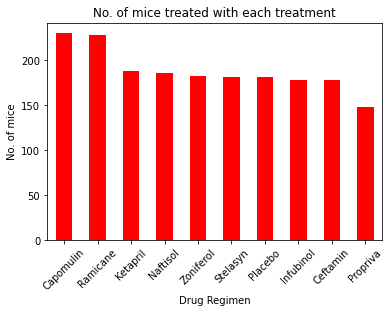

In [19]:
# Bar Chart using Pandas 
fig = Mice_count.plot(kind='bar', color='r', rot=45, title='No. of mice treated with each treatment')
fig.set_xlabel("Drug Regimen")
fig.set_ylabel("No. of mice")

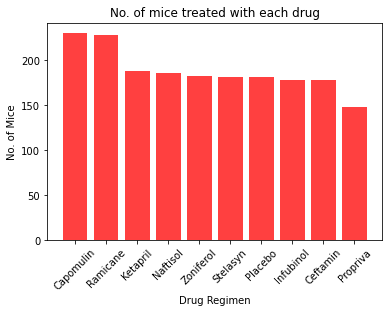

In [20]:
# Bar Chart using Matplotlib

x_axis = Mice_count.index.values
y_axis = Mice_count.values
plt.bar(x_axis, y_axis, color='r', alpha=0.75)
plt.title("No. of mice treated with each drug")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Mice")
plt.xticks(rotation = 45)
plt.show()

# Pie Charts

In [21]:
Gender_mice_count = Clean_df["Sex"].value_counts()
Gender_mice_count

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Gender of Mice'}, ylabel='Sex'>

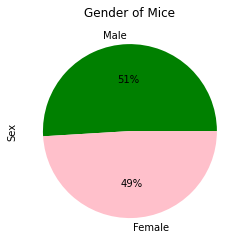

In [22]:
# Pie Chart using Pandas 
Gender_mice_count.plot(kind='pie', y='points', autopct='%1.0f%%',
                       colors = ['Green', 'Pink'],
                       title='Gender of Mice')

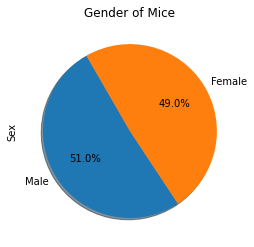

In [23]:
# Pie Chart using Matplotlib
Gender_mice_count.plot.pie(autopct= "%1.1f%%", shadow=True, startangle=120)
plt.title("Gender of Mice")
plt.show()

# Calculation of quartiles, IQR and Outliers

In [24]:
# Group mice together based on treatment for Capomulin, Ramicane, Infubinol, and Ceftamin.
Capo_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin",:]
Rami_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Ramicane", :]
Infu_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Infubinol", :]
Ceft_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Ceftamin", :]

In [25]:
# Greatest treatment timepoint for mice for Capomulin
Capo_max = Capo_df.groupby('Mouse ID').max()['Timepoint']
Capo_max_df = pd.DataFrame(Capo_max)
Capo_merge = pd.merge(Capo_max_df, Clean_df, on=("Mouse ID","Timepoint"),how="left")
Capo_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [26]:
# Quartile, IQR and outlier calculation for Capomulin
Capo_tumors = Capo_merge["Tumor Volume (mm3)"]

quartiles =Capo_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [27]:
# Greatest treatment timepoint for mice for Capomulin
Rami_max = Rami_df.groupby('Mouse ID').max()['Timepoint']
Rami_max_df = pd.DataFrame(Rami_max)
Rami_merge = pd.merge(Rami_max_df, Clean_df, on=("Mouse ID","Timepoint"),how="left")
Rami_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [28]:
# Quartile, IQR and outlier calculation for Ramicane
Rami_tumors = Rami_merge["Tumor Volume (mm3)"]

quartiles =Rami_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [29]:
# Greatest treatment timepoint for mice for Infubinol
Infu_max = Infu_df.groupby('Mouse ID').max()['Timepoint']
Infu_max_df = pd.DataFrame(Infu_max)
Infu_merge = pd.merge(Infu_max_df, Clean_df, on=("Mouse ID","Timepoint"),how="left")
Infu_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [30]:
# Quartile, IQR and outlier calculation for Ramicane
Infu_tumors = Infu_merge["Tumor Volume (mm3)"]

quartiles =Infu_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [31]:
# Greatest treatment timepoint for mice for Ceftamin
Ceft_max = Ceft_df.groupby('Mouse ID').max()['Timepoint']
Ceft_max_df = pd.DataFrame(Ceft_max)
Ceft_merge = pd.merge(Ceft_max_df, Clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceft_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [32]:
# Quartile, IQR and outlier calculation for Ramicane
Ceft_tumors = Ceft_merge["Tumor Volume (mm3)"]

quartiles =Ceft_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


# Box plot of final tumor volume for all four treatment regimens

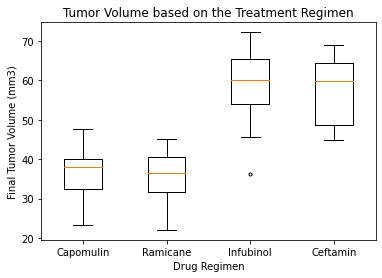

In [33]:
# Multiple box plots on one Axes

Data = [Capo_tumors, Rami_tumors, Infu_tumors, Ceft_tumors]
Drug_Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
plt.boxplot(Data, sym='.', labels=Drug_Regimen)
ax1.set_title("Tumor Volume based on the Treatment Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
plt.show()

# Line Plot and a Scatter Plot for a specific mouse treated with Capomulin - g288

In [34]:
# Mouse g288
mouse_df = Capo_df.loc[Capo_df["Mouse ID"] == "g288",:]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
242,g288,Capomulin,Male,3,19,0,45.000000,0
474,g288,Capomulin,Male,3,19,5,45.839400,0
523,g288,Capomulin,Male,3,19,10,46.304003,1
727,g288,Capomulin,Male,3,19,15,42.172301,1
1083,g288,Capomulin,Male,3,19,20,42.957120,1
1246,g288,Capomulin,Male,3,19,25,42.368692,1
1392,g288,Capomulin,Male,3,19,30,42.874461,1
1540,g288,Capomulin,Male,3,19,35,38.954115,1
1758,g288,Capomulin,Male,3,19,40,36.356851,1
1777,g288,Capomulin,Male,3,19,45,37.074024,1


Text(0, 0.5, 'Tumor Volume (mm3)')

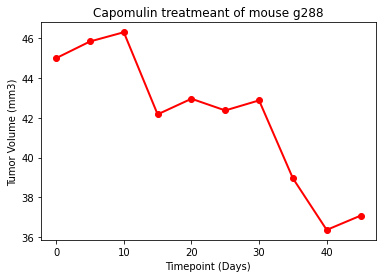

In [35]:
# Line Plot comparing tumor volume post treatment with Capomulin for g288
x_axis = mouse_df["Timepoint"]
y_axis = mouse_df["Tumor Volume (mm3)"]

fig2, ax2 = plt.subplots()
plt.title("Capomulin treatmeant of mouse g288")
plt.plot(x_axis, y_axis,linewidth=2, marker="o", color="red")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


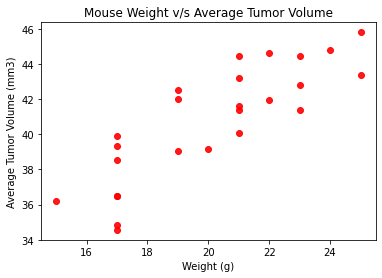

In [36]:
# Scatter plot of tumor volume versus mouse weight for the Capomulin treatment 

Capo_Rx_df =Capo_df.groupby(["Mouse ID"]).mean()
x_axis = Capo_Rx_df["Weight (g)"]
y_axis = Capo_Rx_df["Tumor Volume (mm3)"]
fig3 = plt.scatter(x_axis, y_axis, alpha=0.90, color="red")
marker_size=15
plt.title('Mouse Weight v/s Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


# Calculation of correlation coefficient and linear regression model.

In [37]:
x_axis = Capo_Rx_df["Weight (g)"]
y_axis = Capo_Rx_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.show()

The correlation between mouse weight and average tumor volume is 0.84


The r-squared is: 0.709


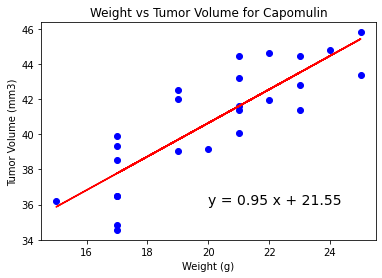

In [38]:
# Plotting the linear regression model on top of the above scatter plot.
x_axis = Capo_Rx_df["Weight (g)"]
y_axis = Capo_Rx_df["Tumor Volume (mm3)"]

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis,y_axis)
regress_values= x_axis* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis,y_axis,color='b')
plt.plot(x_axis, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
